In [6]:
import pandas as pd
import numpy as np
import prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv('data/flights_data.csv')

In [3]:
df

,Dates,no_of_flights
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802
5,2005-06-01,609195
6,2005-07-01,627961
7,2005-08-01,630904
8,2005-09-01,574253
9,2005-10-01,592712


In [9]:
train_df = df.iloc[:25]

In [10]:
test_df = df.iloc[25:]

In [7]:
SARIMAX = SARIMAX(df['no_of_flights'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 3))
results = SARIMAX.fit()

/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [11]:
start = len(train_df)
end = start + len(test_df) - 1
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMAX Predictions')

In [12]:
predictions

25    603840.556851
26    590349.141596
27    656274.543803
28    580082.096258
29    678699.906977
30    641208.055000
31    646969.981623
32    662101.231661
33    637458.859256
34    625481.761086
35    577471.197702
Name: SARIMAX Predictions, dtype: float64

<Axes: >

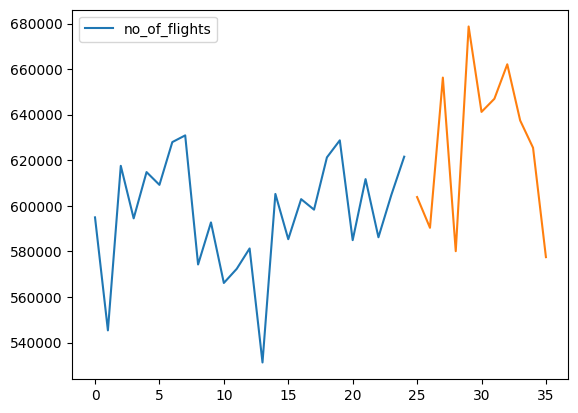

In [18]:
train_df.plot()
# test_df.plot()
predictions.plot()

<Axes: >

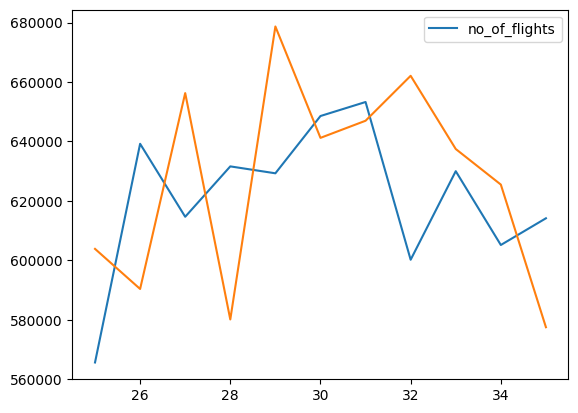

In [ ]:
test_df.plot()
predictions.plot()

In [19]:
train_df

,Dates,no_of_flights
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802
5,2005-06-01,609195
6,2005-07-01,627961
7,2005-08-01,630904
8,2005-09-01,574253
9,2005-10-01,592712


<Axes: >

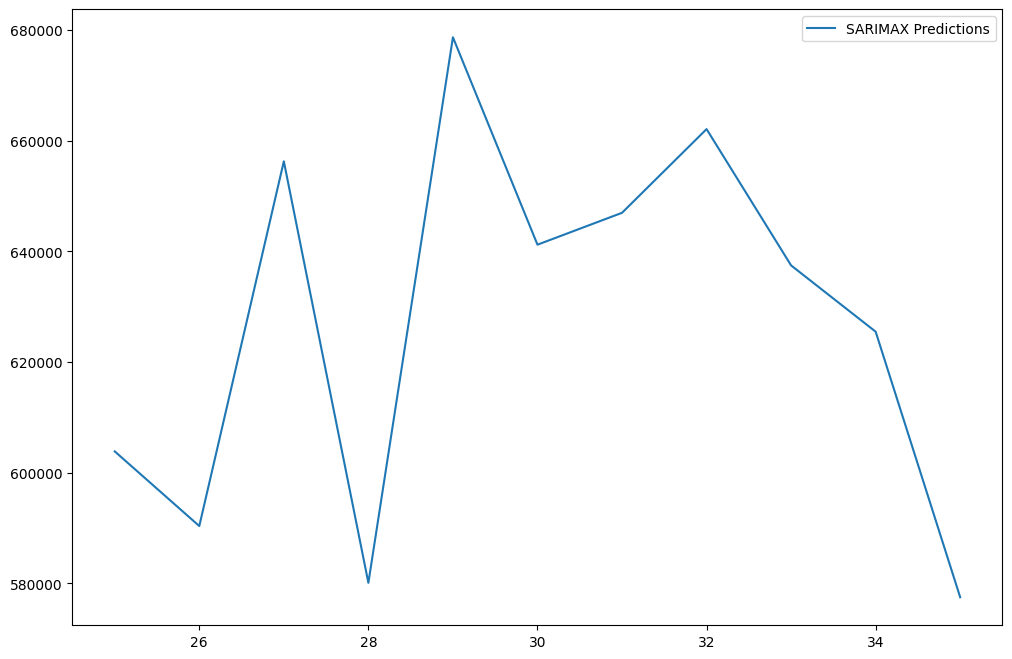

In [15]:
predictions.plot(figsize=(12, 8), legend=True)